# Hands-on Project

<span style="color:red">**Question 1:** </span> List the dataset(s) you chose for this project from the [UCI Machine Learning respository](https://archive.ics.uci.edu/ml/datasets.php).

The dataset I chose for this project is "Adult". 
Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20 


<span style="color:red">**Question 2:** </span> Describe the dataset in your own words. How many data points, how many attributes, how many types of attributes, how many classes (if any)? Who collected it? How was it collected?

This database contains information from the 1994 Census database collected by Barry Becker. It was collected with the conditions: The person must be older than 16 years, have an adjusted gross income (AGI) greater than 100, have a final weight greater than 1, and work more than 0 hours per week. 

The goal from this data is to classify people on weather they make over $50k annually (Binary). 
<br />
    Class 0: >50k
<br />
    Class 1: <=50k

There are 14 total attributes of 3 different types (Integer, Categorical, Binary).
    Attributes: education, education-num, martital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country.




<span style="color:red">**Question 3:** </span> What is your goal? Specifically, what insights do you want to learn from this data. Please be aware that clustering, classification, or itemset mining are not 'insights'. These are data mining tasks. Insights are relevant to the domain from which the data is generated.

My goal for this data is to find out how well we can predict whether or not somebody is divorced (binary classification) based on the following attributes: education, hours-per-week, income (above/below $50k), race, and age.

<span style="color:red">**Question 4:** </span> List the data mining task(s) and the specific algorithms you want to perform on this data. Do not pick the tasks listed in the 'Default Task' column on the UCI page.

I want to start using LDA because I just want to start simple to see if I can linearly split the data into two. 

<span style="color:red">**Question 5:** </span> Before selecting the methods you listed in response to Question 4, what are all methods you originally considered to use for the selected data mining task? What was your rationale for selecting the methods you listed in response to Question 4? What was your rationale for not selecting other methods?


From our class, Intelligent Data Analysis, we have learned multiple algorithms that I considered using: Decision Trees, kNN, Bayes Classifiers and the different types of SVM's. We have also learned about Linear Discriminant Analysis and Principle Component Analysis that linearly classifys data into two parts. 

<span style="color:red">**Question 6:** </span> What limitations does your 'selected' method(s) has(have) that may limit your ability to accomplish the goal you have set for yourself? 


A limitation of LDA is it is sensitive to outliers. I also am curious to find out what parameters I can optimize for to classify the data correctly and will start with only two. I am unsure of how many outliers exist in my data and I will be able to view this during discovery. 

<span style="color:red">**Question 7:** </span> Do you have any alternative plan/strategy to overcome the above limitation(s)?

If the data cannot be classified using linearly, I plan to use a more complex algorithm that can consider more parameters. I am thinking something like a builing a decision tree or making an SVM. I also believe there are enough data points to do a kNN algorithm.

<span style="color:red">**Question 8:** </span> For each of the methods you want to use, what parameter choices do you want to use and why? It does not have to be one parameter choice, it could be a collection or a range of choices you may want to consider.

The parameters I want to use are: education, hours-per-week, income (above/below $50k), race, and age.

<span style="color:red">**Question 9:** </span> How will you evaluate that you are successful in your pursuing your goal at the end of the project? In other words, what is your evaluation criteria?


If I can get 85% or more accuracy I will consider the model is successful in its goal.

<span style="color:red">**Question 11:** </span> Show any visualizations you may have generated to understand your data. Please include the code you used and the plots below. If you borrowed code (entirely or partially) from the hands-on projects or anywhere else, clearly provide a link to your source.

You may use this package to load UCI data in python: https://github.com/SkafteNicki/py_uci

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
education = adult.data.features.education
race = adult.data.features.race
sex = adult.data.features.sex
occupation = adult.data.features.occupation
age = adult.data.features.age
isIncome = adult.data.targets
# maritalStatus = adult.data.features.marital-status
# y = adult.data.targets
  

In [2]:
# Create new target which changes marital-status to binary array
newTarget = [1 if status == 'Divorced' else 0 for status in adult.data.features['marital-status']]
newIncome = [1 if income == '>50K' else 0 for income in list(adult.data.targets['income'])]

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Create a dictionary for usable parameters
data_dict = {
    'education': np.array(adult.data.features.education),
    'race': np.array(adult.data.features.race),
    'sex': np.array(adult.data.features.sex),
    'occupation': np.array(adult.data.features.occupation),
    'income': np.array(newIncome),
    'age': np.array(adult.data.features.age),
    'hours': np.array(adult.data.features['hours-per-week']),
    'maritalStatus': np.array(newTarget)
}

# Number of random samples to select
n_samples = 150

indices = np.random.choice(len(data_dict['education']), size=n_samples, replace=False)

selected_data_dict = {
  'education': data_dict['education'][indices],
  'race': data_dict['race'][indices],
  'sex': data_dict['sex'][indices],
  'occupation': data_dict['occupation'][indices],
  'income': data_dict['income'][indices],
  'age': data_dict['age'][indices],
  'hours': data_dict['hours'][indices],
  'maritalStatus': data_dict['maritalStatus'][indices]
}

# Convert marital status to markers: x=Divorced, o=Not Divorced
markers = ['x' if m == 1 else 'o' for m in selected_data_dict['maritalStatus']]

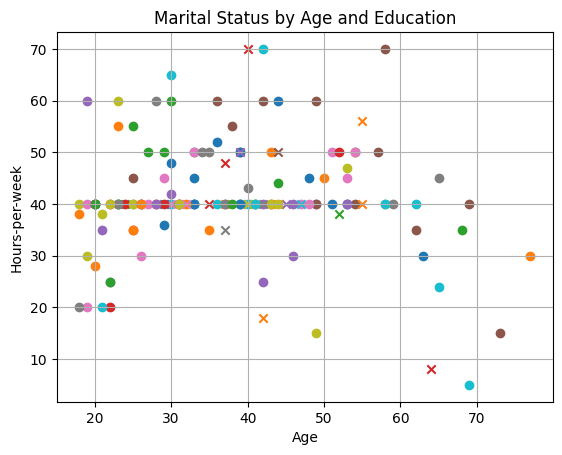

In [4]:
# Plot the data
for age, hrs, mkr in zip(selected_data_dict['age'], selected_data_dict['hours'], markers):
    plt.scatter(age, hrs, marker=mkr)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Hours-per-week') 
plt.title('Marital Status by Age and Education')
plt.grid(True)


# Show the plot
plt.show()

<span style="color:Green">
    Above we see when give two Principle Directions of Hours-per-Week (worked) and Age, the classes are not seperable linearly or entirely.
</span>

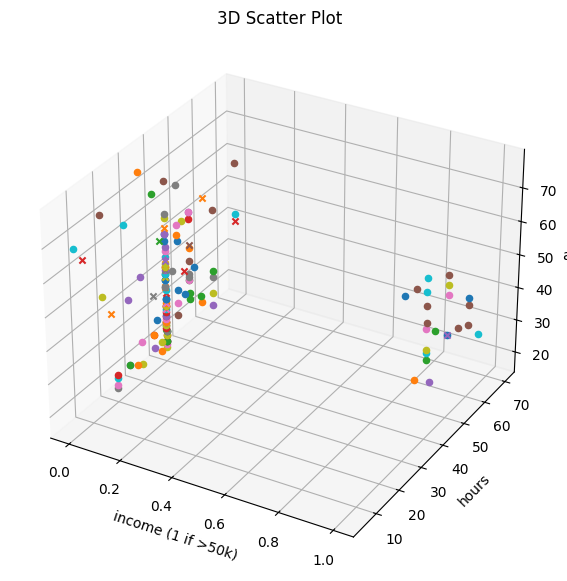

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot using only the selected data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for inc, hrs, age, mkr in zip(selected_data_dict['income'], selected_data_dict['hours'], selected_data_dict['age'], markers):
    ax.scatter(inc, hrs, age, marker=mkr)

# Customize the plot
ax.set_xlabel('income (1 if >50k)')
ax.set_ylabel('hours')
ax.set_zlabel('age')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()

<span style="color:Green">
    When adding another element (which was the original classification target) that shows if a person makes >50k, we see this may seperate the data a little better, but there needs to be more parameters for this classification. It is interesting to note the majority of points that make more than 50k work more hours per week and have a high tendency for not being divorced.
</span>

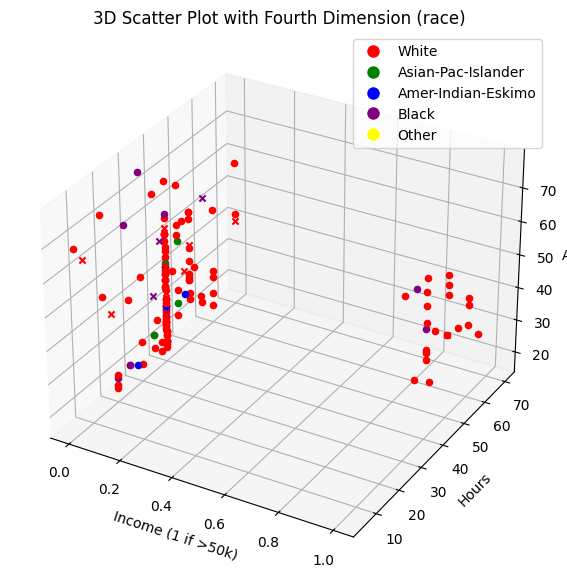

In [6]:
# Define a color for each category (e.g., 'A', 'B', 'C')
category_colors = {
    'White': 'red',
    'Asian-Pac-Islander': 'green',
    'Amer-Indian-Eskimo': 'blue',
    'Black': 'purple',
    'Other': 'yellow'
}

# Create a 3D scatter plot using only the selected data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for inc, hrs, age, race, mkr in zip(selected_data_dict['income'], selected_data_dict['hours'],
                               selected_data_dict['age'], selected_data_dict['race'], markers):
    ax.scatter(inc, hrs, age, marker=mkr, color=category_colors[race])


# Customize the plot
ax.set_xlabel('Income (1 if >50k)')
ax.set_ylabel('Hours')
ax.set_zlabel('Age')
ax.set_title('3D Scatter Plot with Fourth Dimension (race)')

# Create a custom legend for categories
custom_legends = [plt.Line2D([0], [0], marker='o', color='w', label=cat, 
                              markerfacecolor=col, markersize=10) for cat, col in category_colors.items()]
ax.legend(handles=custom_legends)

# Show the plot
plt.show()

<span style="color:Green">
Finally, I added a fourth dimension to visualize this data even furthur. This does not help that much because the data is not diverse in the dimension of 'race'. This is understandable though because the data was collected in the 90's - lol. 
A couple of trends in the data I see is the frequency of divorce increases with Age and the frequency of divorce decreases in the group of people that make more than $50k yearly. 
I plan to switch from my original plan to making a random forest based on the visualization of the data. There are multiple factors (dimensions) I must consider in order to classify with any type of accuracy. After plotting a fourth dimension and being able to see trends in the data I believe I can make a model that can classify the data. 
</span>

<span style="color:blue">
I plan to use a random forest. Its an ensemble method that uses multiple decision trees to improve the classification accuracy. It is more robust than just one decision tree and is better at not overfitting to the training data.
</span>

<span style="color:red">**Question 12:** </span> **Perform data mining, evaluate your work and report your findings.** This should include code, plots and results you may have generated. If you borrowed code (entirely or partially) from the hands-on projects or anywhere else, clearly provide a link to your source.

I am following this tutorial for random forest classification: -> https://www.datacamp.com/tutorial/random-forests-classifier-python 

In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 

# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [8]:
# Create new target which changes marital-status to binary array
newTarget = [1 if status == 'Divorced' else 0 for status in adult.data.features['marital-status']]
newIncome = [1 if income == '>50K' else 0 for income in list(adult.data.targets['income'])]

In [9]:
# LABEL ENCODING
# the categorical data must be transformed into integers for the classifier to work with (cannot work with categlorical strings)

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

adult.data.features.loc[:, 'occupation'] = label_encoder.fit_transform(adult.data.features['occupation'])
adult.data.features.loc[:, 'workclass'] = label_encoder.fit_transform(adult.data.features['workclass'])
adult.data.features.loc[:, 'education'] = label_encoder.fit_transform(adult.data.features['education'])
adult.data.features.loc[:, 'relationship'] = label_encoder.fit_transform(adult.data.features['relationship'])
adult.data.features.loc[:, 'race'] = label_encoder.fit_transform(adult.data.features['race'])
adult.data.features.loc[:, 'sex'] = label_encoder.fit_transform(adult.data.features['sex'])
adult.data.features.loc[:, 'native-country'] = label_encoder.fit_transform(adult.data.features['native-country'])

In [10]:
adult.data.targets = newTarget
adult.data.features['income'] = newIncome

# Get rid of the 'marital-status' dimension
adult.data.features.drop('marital-status', axis=1, inplace=True)

# Splitting the data: train and test
X = adult.data.features # Features
y = adult.data.targets # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
# Run the test data throught the model
y_pred = rf.predict(X_test)

In [13]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8789026512437301
Precision: 0.5894519131334023
Recall: 0.42035398230088494


In [21]:
# Generate predictions with the best model
y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<span style="color:green" >
Above is a confusion matrix of the model's performance. The diagonal top left to bottom right show the correct predicted labels. We see a good amount of accuracy coming from this model - I consider this successful in itself before parameter manipulation.
</span>

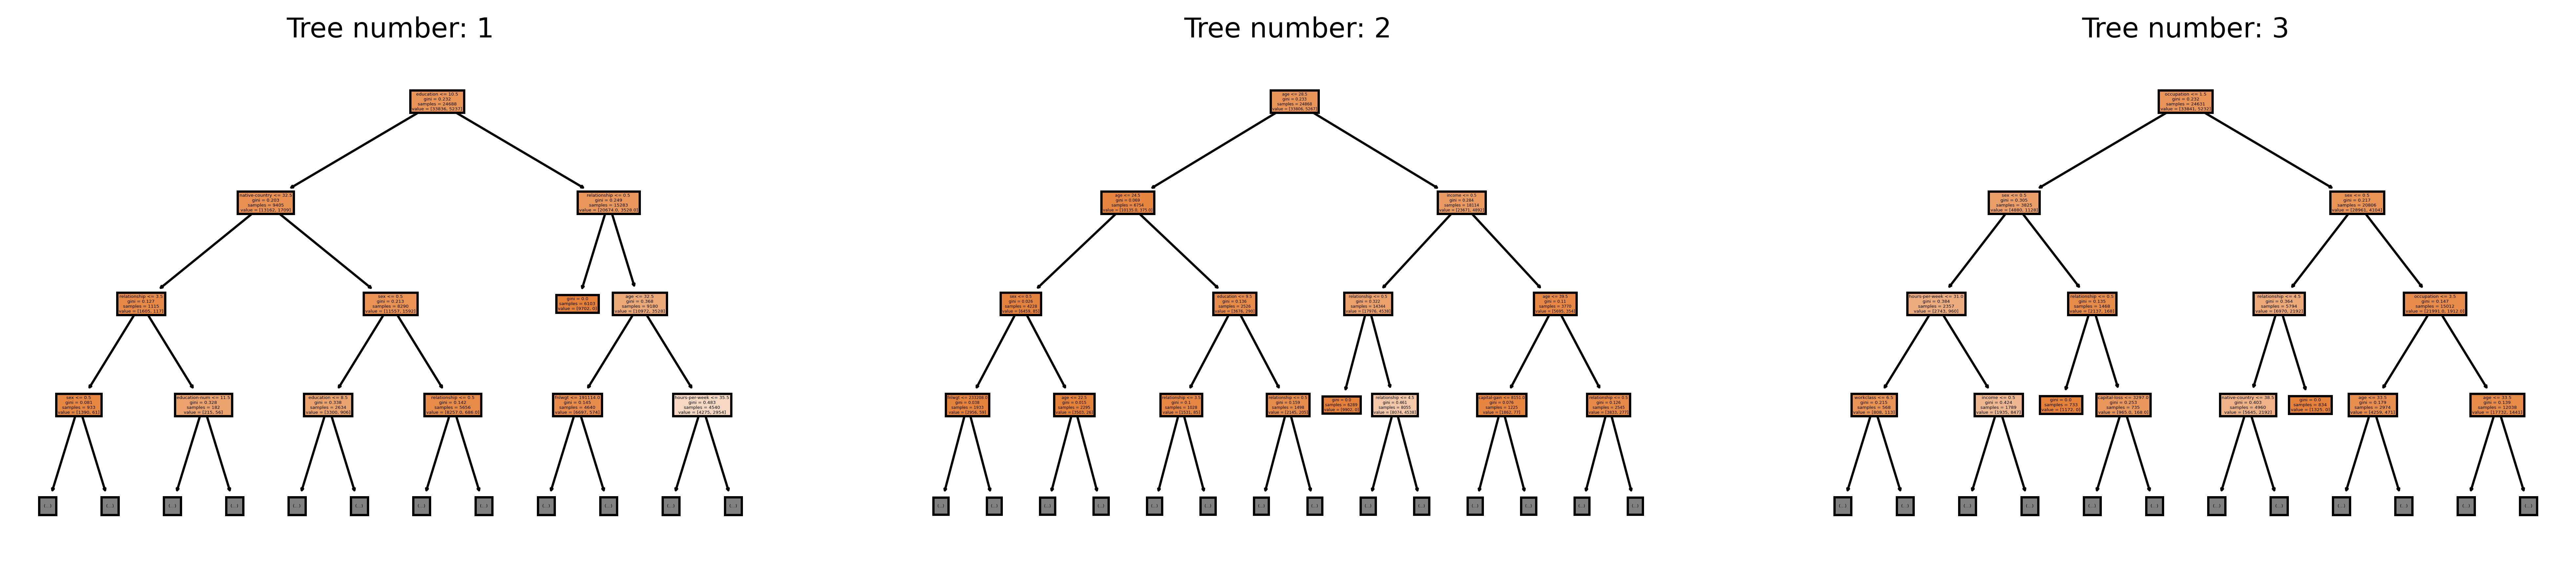

In [15]:
from sklearn.tree import plot_tree

# Plot the first three decision trees from the random forest
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4), dpi=500)

for index in range(3):
    tree = rf.estimators_[index]
    plot_tree(tree, feature_names=X_train.columns, filled=True, ax=axes[index], max_depth=3)
    axes[index].set_title(f'Tree number: {index+1}')

plt.show()

<span style="color:green">
The accuracy reached my original goal, I want to see if I can adjust the parameters of the model and train it to a high accuracy. I also want to reduce the amount of dimensions I give it (specifically fnlwgt, capital-gain, capital-loss).
</span>

In [16]:
# Get rid of the 'marital-status' dimension
adult.data.features.drop('fnlwgt', axis=1, inplace=True)
adult.data.features.drop('capital-gain', axis=1, inplace=True)
adult.data.features.drop('capital-loss', axis=1, inplace=True)

# Splitting the data: train and test
X = adult.data.features # Features
y = adult.data.targets # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024076F34410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002405EE16BD0>})

In [18]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 13, 'n_estimators': 387}


In [23]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

NameError: name 'knn' is not defined

In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

<span style="color:red">**Question 13:** </span> Putting your findings in the context of your goal and evaluation plan, do you consider yourself successful? Provide reasons for your success or lack thereof.

<span style="color:red">**Question 14:** </span> If you have an extra month to work on this project, what else would you do? Provide reasons.

<span style="color:red">**Question 15:** </span> Do you consider this project to be in the 'innovative category' or a 'good application' category? Provide your reason. 